Project name:  Handwritten digits classifier from the scrach by using Neural Networks and Pytorch

Author: Mrinmayee Dhumne

Programming language: Python

Dataset: MNIST Databasse 

In [1]:
# Import neccessary libraries and pakeges 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
from time import time
import torch
import torchvision
from torchvision import datasets, transforms


# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


#Modifictions on the data before feeding it into the pipeline using torchvision.transforms.
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [16]:
#Let's download the dataset
#use DataLoader in pytorch
#Train dataset
train = datasets.MNIST('TRAINSET', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

#validation dataset
val = datasets.MNIST('TESTSET', download=True, train=False, transform=transform)
val_loader = torch.utils.data.DataLoader(val, batch_size=64, shuffle=True)

Exploratory Data Analysis 

In [17]:
# pytorch dataLoaders are iterable
#images and tensors
data_iter = iter(train_loader)
images, labels = data_iter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


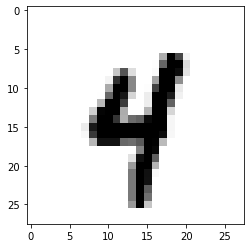

In [18]:
## Reshaping the dataset, so that we can display the individual images
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

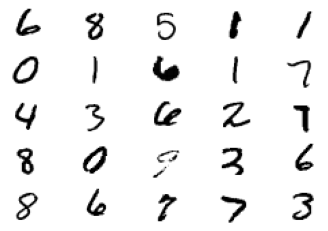

In [19]:
#how the dataset looks like.
fig = plt.figure()
num_images = 25
for index in range(1, num_images + 1):
    plt.subplot(5, 5, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [20]:
#Build the Neural Network
#contains an input layer (the first layer), 
#an output layer of ten neurons (or units, the circles) 
#and two hidden layers in between.

from torch import nn, optim
input_size = 784
hidden_sizes = [128, 128]
output_size = 10

#Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [8]:
# used Negative log-likelihood loss function for multi-class classification
criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logprob = model(images) #log probabilities
loss = criterion(logprob, labels) #calculate the NuLL loss

In [9]:
#adjustment of weights of the network to minimize the loss


print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [-0.0038, -0.0038, -0.0038,  ..., -0.0038, -0.0038, -0.0038],
        ...,
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004]])


In [24]:
# Optimizers for adjusting model parameters to reduce model error in training step
# I used  stochastic gradient descent SGD from pytorch
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [29]:
print('Initial weights - ', model[0].weight)
images, labels = next(iter(train_loader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward then backward pass & update the  weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('After Gradient -', model[0].weight.grad)


Initial weights -  Parameter containing:
tensor([[ 0.0237, -0.0344,  0.0206,  ..., -0.0131, -0.0225, -0.0230],
        [-0.0103,  0.0317,  0.0151,  ...,  0.0317,  0.0189, -0.0334],
        [-0.0174, -0.0070, -0.0297,  ..., -0.0314, -0.0283,  0.0198],
        ...,
        [-0.0298, -0.0248, -0.0203,  ...,  0.0078,  0.0012,  0.0268],
        [-0.0083,  0.0292,  0.0077,  ...,  0.0314,  0.0310,  0.0231],
        [ 0.0160, -0.0175,  0.0191,  ...,  0.0145, -0.0236,  0.0327]],
       requires_grad=True)
After Gradient - tensor([[-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        ...,
        [ 0.0071,  0.0071,  0.0071,  ...,  0.0071,  0.0071,  0.0071],
        [ 0.0031,  0.0031,  0.0031,  ...,  0.0031,  0.0031,  0.0031],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [30]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0237, -0.0344,  0.0206,  ..., -0.0131, -0.0225, -0.0230],
        [-0.0103,  0.0317,  0.0151,  ...,  0.0317,  0.0189, -0.0334],
        [-0.0174, -0.0070, -0.0297,  ..., -0.0314, -0.0283,  0.0198],
        ...,
        [-0.0298, -0.0249, -0.0204,  ...,  0.0077,  0.0011,  0.0267],
        [-0.0083,  0.0292,  0.0077,  ...,  0.0314,  0.0310,  0.0231],
        [ 0.0160, -0.0175,  0.0191,  ...,  0.0145, -0.0236,  0.0327]],
       requires_grad=True)


Core Training Of the Neural Network


In [31]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6040696998887352
Epoch 1 - Training loss: 0.27125666722623526
Epoch 2 - Training loss: 0.20933705601277255
Epoch 3 - Training loss: 0.17170178581442216
Epoch 4 - Training loss: 0.14541422011954253
Epoch 5 - Training loss: 0.12509621257212625
Epoch 6 - Training loss: 0.11172730396035066
Epoch 7 - Training loss: 0.09801514144403053
Epoch 8 - Training loss: 0.08968095948844194
Epoch 9 - Training loss: 0.08127538540583255
Epoch 10 - Training loss: 0.0739442118516029
Epoch 11 - Training loss: 0.067002068032453
Epoch 12 - Training loss: 0.06067074806084916
Epoch 13 - Training loss: 0.056550597726329685
Epoch 14 - Training loss: 0.05203439135711068

Training Time (in minutes) = 2.730213471253713


Prediction = 0


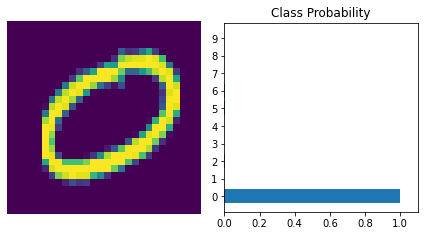

In [36]:
#Testing

#lets build a function for viewing an image and it's most probable class.
    
def prediction(img, ps):
    
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

images, labels = next(iter(val_loader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Prediction =", probab.index(max(probab)))
prediction(img.view(1, 28, 28), ps)

Model Evaluation

In [39]:
correct_count, count_all = 0, 0
for images,labels in val_loader:
  for i in range(len(labels)):
    image = images[i].view(1, 784)
    # Turn off gradients to speed for a while
    with torch.no_grad():
        logps = model(image)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    count_all += 1

print("Number Of Images Tested =", count_all)
print("\nModel Accuracy =", (correct_count/count_all))

Number Of Images Tested = 10000

Model Accuracy = 0.972
